### Import necessary libraries

In [89]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Deafault style for plots
plt.style.use('default')

### Load CSV files
Set CUSTOM_DATA_DIR if needed if your files are not in current working directory.

In [91]:
CUSTOM_DATA_DIR = r'/Users/estherboudagher/Desktop/Python/Data 2'

SEARCH_DIRS = [Path.cwd()]  # Current working directory (cwd)
if CUSTOM_DATA_DIR:
    # Path(CUSTOM_DATA_DIR) turns the string into a Path object
    SEARCH_DIRS.insert(0, Path(CUSTOM_DATA_DIR))

FILENAMES = {
    'stocks': 'sp500_stocks.csv', 
    'index': 'sp500_index.csv',
    'companies': 'sp500_companies.csv'
}

# Find current paths for all files
def find_csv(name):
    for directory in SEARCH_DIRS:
        p = directory / name      # pathlib trick: '/' operator joins paths safely
        if p.exists():
            return p.resolve() # If file is found, stop searching and return the full 'real' path
    raise FileNotFoundError(
        f"Couldn't find {name} in the current working directory."
        ' \nSet CUSTOM_DATA_DIR or move file into your working directory.'
)

paths = {key: find_csv(name) for key, name in FILENAMES.items()}

# Load CSV fles
df_stocks = pd.read_csv(paths['stocks'], parse_dates=['Date'])
df_index = pd.read_csv(paths['index'], parse_dates=['Date'])
df_companies = pd.read_csv(paths['companies'])

### Check consistency in columns names before merging
Rename if needed, columns should be named: 'Symbol', 'Adj Close', 'IndexClose'

In [93]:
dfs = {
    'df_stocks': df_stocks,
    'df_index': df_index,
    'df_companies': df_companies
}

for name, df in dfs.items():
    print(f'\n{name}: {df.columns}')


df_stocks: Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')

df_index: Index(['Date', 'S&P500'], dtype='object')

df_companies: Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')


In [94]:
# Rename 'S&P500' column into 'IndexClose'
df_index.rename(columns={'S&P500': 'IndexClose'}, inplace=True)

### Normalize 'Symbol' and 'Sector' columns

In [96]:
# Normalize tickers
df_stocks.Symbol = df_stocks.Symbol.astype(str).str.strip().str.upper()
df_companies.Symbol = df_companies.Symbol.astype(str).str.strip().str.upper()

# Normalize sectors
df_companies.Sector = df_companies.Sector.astype(str).str.strip().replace('', 'Unknown')

### Insure Date is the datetime object

In [98]:
df_stocks.Date = pd.to_datetime(df_stocks.Date, errors='coerce')
df_index.Date = pd.to_datetime(df_index.Date, errors='coerce')

### Merging

In [100]:
df_merged = (
    df_stocks
    .merge(df_companies, on='Symbol', how='left', validate='many_to_one')
    .merge(df_index, on='Date', validate='many_to_one')  
)
print('Merged dataset: \n')
df_merged    

Merged dataset: 



,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,IndexClose
0,2014-11-13,MMM,102.024780,132.399673,133.001678,131.672241,132.107025,2840620.0,NYQ,3M Company,...,71582277632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001280,2039.33
1,2014-11-14,MMM,102.346916,132.817719,132.842804,131.864548,132.550171,2136415.0,NYQ,3M Company,...,71582277632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001280,2039.82
2,2014-11-17,MMM,102.243828,132.683945,133.076920,132.182281,132.182281,2002463.0,NYQ,3M Company,...,71582277632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001280,2041.32
3,2014-11-18,MMM,103.184509,133.904678,134.163879,132.817719,132.842804,2764434.0,NYQ,3M Company,...,71582277632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001280,2051.80
4,2014-11-19,MMM,102.991676,132.801010,133.285950,132.081940,133.219070,2768381.0,NYQ,3M Company,...,71582277632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001280,2048.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265543,2024-11-06,ZTS,170.369995,170.369995,178.919998,169.309998,178.520004,5362100.0,NYQ,Zoetis Inc.,...,79874244608,3.764000e+09,0.110,Parsippany,NJ,United States,14100.0,"Zoetis Inc. engages in the discovery, developm...",0.001428,5929.04
1265544,2024-11-07,ZTS,174.250000,174.250000,174.789993,169.639999,172.589996,3781300.0,NYQ,Zoetis Inc.,...,79874244608,3.764000e+09,0.110,Parsippany,NJ,United States,14100.0,"Zoetis Inc. engages in the discovery, developm...",0.001428,5973.10
1265545,2024-11-08,ZTS,176.820007,176.820007,177.100006,173.220001,174.250000,3243400.0,NYQ,Zoetis Inc.,...,79874244608,3.764000e+09,0.110,Parsippany,NJ,United States,14100.0,"Zoetis Inc. engages in the discovery, developm...",0.001428,5995.54
1265546,2024-11-11,ZTS,176.149994,176.149994,178.380005,175.000000,176.929993,3399500.0,NYQ,Zoetis Inc.,...,79874244608,3.764000e+09,0.110,Parsippany,NJ,United States,14100.0,"Zoetis Inc. engages in the discovery, developm...",0.001428,6001.35


In [101]:
print('Data types of merged dataset:')
print(df_merged.dtypes)

Data types of merged dataset:
Date                   datetime64[ns]
Symbol                         object
Adj Close                     float64
Close                         float64
High                          float64
Low                           float64
Open                          float64
Volume                        float64
Exchange                       object
Shortname                      object
Longname                       object
Sector                         object
Industry                       object
Currentprice                  float64
Marketcap                       int64
Ebitda                        float64
Revenuegrowth                 float64
City                           object
State                          object
Country                        object
Fulltimeemployees             float64
Longbusinesssummary            object
Weight                        float64
IndexClose                    float64
dtype: object


# Cleaning

In [103]:
# 1. Sort and drop duplicates
df_sorted = df_merged.sort_values(['Symbol', 'Date']).drop_duplicates(subset=['Symbol', 'Date'])

# 2. Missing values in OHLCV
fill_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in fill_cols:
    df_sorted[col] = df_sorted.groupby('Symbol')[col].transform(lambda s: s.ffill().bfill())

# Volume can not be zero, replace with Nan and re-fill per stock
wd_mask = df_sorted.Date.dt.dayofweek < 5                  # Weekday mask
zero_wd_mask = (df_sorted.Volume.abs() < 1e-10) & wd_mask  # Zero volume on weekdays mask

if zero_wd_mask.any():
    df_sorted.loc[zero_wd_mask, 'Volume'] = np.nan
    # Fill created missing values
    df_sorted.Volume = df_sorted.groupby('Symbol').Volume.transform(lambda s: s.ffill().bfill())
    
# 3. Missing values in IndexClose
df_sorted.IndexClose = df_sorted.IndexClose.ffill().bfill()

# 4. Enforce price envelope: Low ≤ {Open, Close, Adj Close} ≤ High
high_candidates = ['Open', 'High', 'Close', 'Adj Close']
low_candidates = ['Open', 'Low', 'Close', 'Adj Close']

row_max = df_sorted[high_candidates].max(axis=1)
row_min = df_sorted[low_candidates].min(axis=1)

df_sorted.High = row_max
df_sorted.Low = row_min

# 5. Final check-up for missing values
critical_cols = fill_cols + ['IndexClose']
df_cleaned = df_sorted.dropna(subset=critical_cols)
print('Missing values in critical columns after cleaning:')
print(df_cleaned[critical_cols].isnull().sum())

Missing values in critical columns after cleaning:
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
IndexClose    0
dtype: int64


# EDA
1. Market trend line (S&P 500/IndexClose).
2. Sector distribution (which sectors have how many stocks and how they performed).
3. 5-year total return per stock (Top-5 / Bottom-5 and compute sector averages/medians).
4. Volatility by sector
5. How related (correlated) returns are across sectors or two tickers.
6. A couple of single-stock views (price line, returns histogram, pair correlation).

In [105]:
avail_syms = sorted(df_cleaned.Symbol.dropna().unique().tolist())
print(
    f'First 25 available symbols ({len(avail_syms)} total):',
    ', '.join(avail_syms[:25]),
('...' if len(avail_syms) > 25 else '')
)

First 25 available symbols (503 total): A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ADM, ADP, ADSK, AEE, AEP, AES, AFL, AIG, AIZ, AJG, AKAM, ALB, ALGN, ALL, ALLE, AMAT ...


### 1. Overall market trend

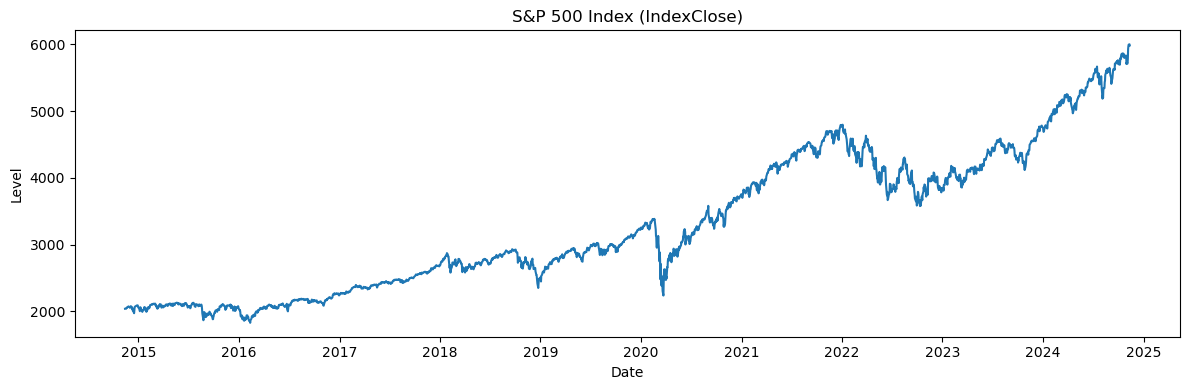

In [107]:
market_series = (
    df_cleaned[['Date', 'IndexClose']]
    .drop_duplicates('Date')
    .set_index('Date')['IndexClose']  
    .sort_index()
)

"""
If IndexClose is not available:
price_col = 'Adj Close'
market_series = df_cleaned.groupby('Date')[price_col].mean().sort_index()
"""
# Plot market trend
plt.figure(figsize=(12,4))
plt.plot(market_series.index, market_series.values)
plt.title('S&P 500 Index (IndexClose)')
plt.xlabel('Date')
plt.ylabel('Level')
plt.tight_layout()
plt.show()

### 2. Sector distribution

Sector
Technology                82
Industrials               70
Financial Services        67
Healthcare                63
Consumer Cyclical         55
Consumer Defensive        37
Utilities                 32
Real Estate               31
Basic Materials           22
Communication Services    22
Energy                    22


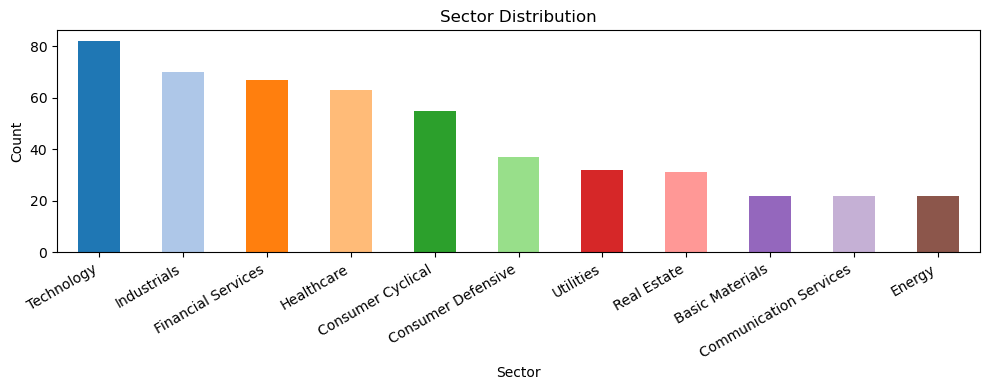

In [109]:
sec_counts = (
    df_cleaned.drop_duplicates(subset=['Symbol', 'Sector'])
    .groupby('Sector')['Symbol']
    .nunique()
    .sort_values(ascending=False)
)
print(sec_counts.to_string())

# Bar chart of sector distribution
colors = plt.cm.tab20.colors

plt.figure(figsize=(10,4))
sec_counts.plot(kind='bar', color=colors)

plt.title('Sector Distribution')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### 3. 10-year total return per stock


Top 5 stocks by totatl % return:
        total_return_pct       Sector
Symbol                               
NVDA            31634.88   Technology
AVGO            15182.32   Technology
AMD              5299.62   Technology
FICO             3176.60   Technology
BLDR             2959.08  Industrials

Bottom 5 stocks by total % return:
        total_return_pct                  Sector
Symbol                                          
WBA               -80.84              Healthcare
PARA              -72.99  Communication Services
VTRS              -72.74              Healthcare
WBD               -71.94  Communication Services
APA               -64.97                  Energy

Sector performance (avg/median % return):
                        avg_return  med_return  n_stocks
Sector                                                  
Technology                 1155.50      435.06        82
Industrials                 398.16      255.92        70
Financial Services          302.22      259.57    

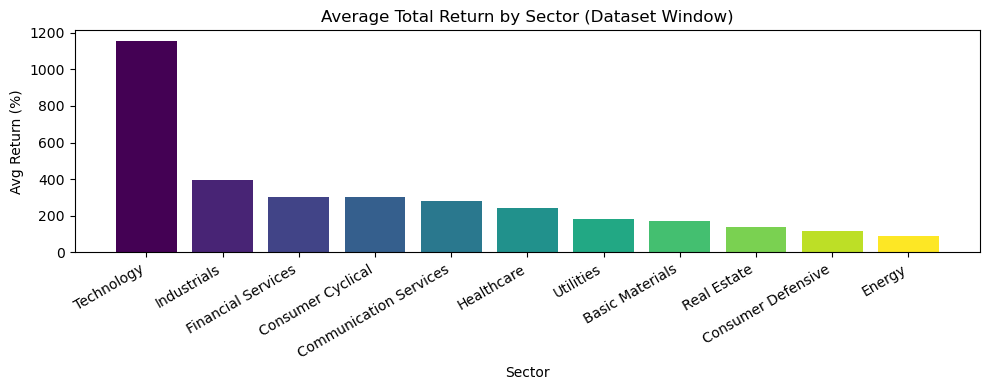

In [111]:
price_col = 'Adj Close'

first_last = df_cleaned.groupby('Symbol')[price_col].agg(first_price='first', last_price='last')

# Percentage of total return
first_last['total_return_pct'] = (first_last.last_price / first_last.first_price -1) * 100

# Attach sector to symbol
sym2sec = (
    df_cleaned[['Symbol', 'Sector']].dropna(subset=['Symbol'])
    .drop_duplicates()
    .set_index('Symbol')
)
# Merging on index Symbol
first_last = first_last.merge(sym2sec, left_index=True, right_index=True)

# Top-5 and bottom-5 performers
top5 = first_last.sort_values(by='total_return_pct', ascending=False).head(5)
bottom5 = first_last.sort_values(by='total_return_pct').head(5)  

print('\nTop 5 stocks by totatl % return:')
print(top5[['total_return_pct', 'Sector']].round(2))
print('\nBottom 5 stocks by total % return:')
print(bottom5[['total_return_pct', 'Sector']].round(2))

sector_performance = (
    first_last.groupby('Sector')['total_return_pct']
    .agg(avg_return='mean', med_return='median', n_stocks='count')
    .sort_values(by='avg_return', ascending=False)
)

print('\nSector performance (avg/median % return):')
print(sector_performance.round(2))

# Bar chart of average sector returns
colors = plt.cm.viridis(np.linspace(0, 1, len(sector_performance)))

plt.figure(figsize=(10, 4))
plt.bar(sector_performance.index, sector_performance.avg_return, color=colors)

plt.title('Average Total Return by Sector (Dataset Window)')
plt.ylabel('Avg Return (%)')
plt.xlabel('Sector')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### 4. Daily return volatility per sector

In [113]:
df_cleaned['DailyRet'] = df_cleaned.groupby('Symbol')[price_col].pct_change()

# Per-stock volatility (std of DailyRet), then median by sector
vol_per_sym = df_cleaned.groupby('Symbol')['DailyRet'].std().rename('sigma').to_frame()
# Merging on index Symbol
vol_per_sym = vol_per_sym.merge(sym2sec, left_index=True, right_index=True)

sector_vol = (
    vol_per_sym.groupby('Sector')['sigma'].median().sort_values(ascending=False)
)
print('\nMedian daily-return volatility by sector:')
print(sector_vol.round(4).to_string())


Median daily-return volatility by sector:
Sector
Energy                    0.0258
Technology                0.0212
Consumer Cyclical         0.0206
Basic Materials           0.0198
Financial Services        0.0185
Communication Services    0.0185
Healthcare                0.0177
Industrials               0.0172
Real Estate               0.0169
Consumer Defensive        0.0145
Utilities                 0.0145


### 5. Correlation heatmap across sectors

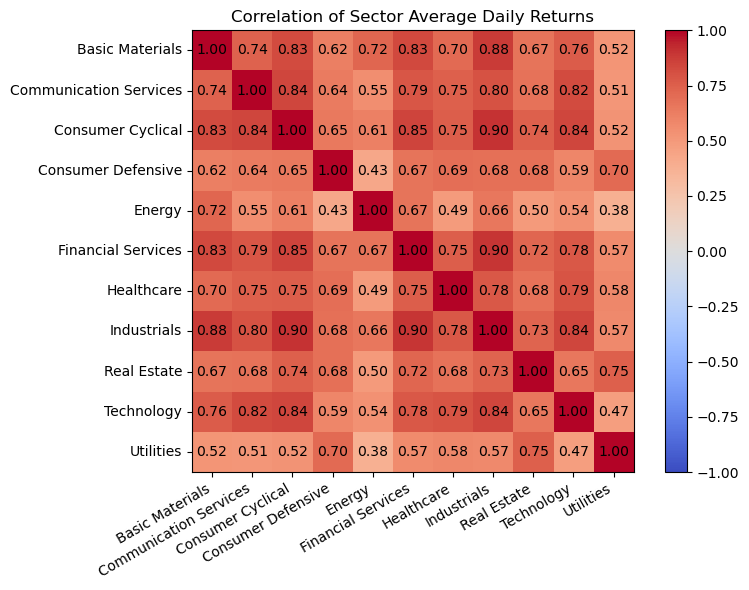

In [115]:
sector_daily = (
    df_cleaned.groupby(['Date', 'Sector'])['DailyRet']
    .mean()
    .reset_index()
    .pivot(index='Date', columns='Sector', values='DailyRet')
)

corr_matrix = sector_daily.corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar(im)

plt.title('Correlation of Sector Average Daily Returns')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=30, ha='right')
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index, rotation=0, va='center')

# Display correlation values on the heatmap
for (i, j), val in np.ndenumerate(corr_matrix.values):  
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
    
plt.tight_layout()
plt.show()

### 6.1 Individual stock views

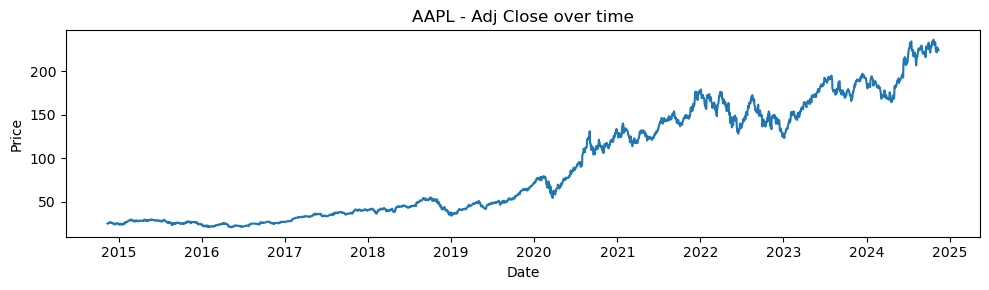

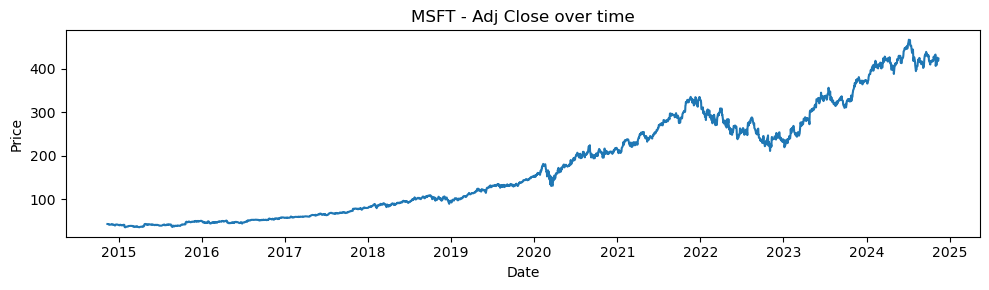

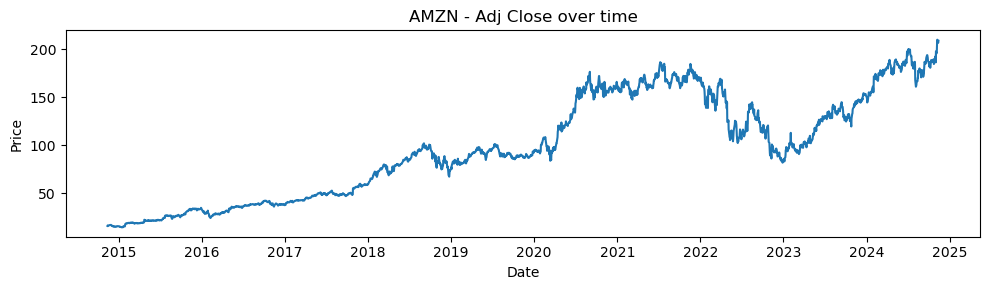

In [117]:
example_wish = ['AAPL', 'MSFT', 'AMZN']

example_wish = [sym.strip().upper() for sym in example_wish]
for sym in example_wish:
    sub = df_cleaned[df_cleaned.Symbol == sym] 
    if sub.empty:
        print(f'{sym} not found — skipping')
        continue
    plt.figure(figsize=(10,3))
    plt.plot(sub.Date, sub[price_col])
    
    plt.title(f'{sym} - {price_col} over time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

### 6.2 Yearly market returns

In [119]:
market_df = market_series.to_frame('Level').copy()
market_df['Year'] = market_df.index.year

yearly_pct = market_df.groupby('Year')['Level'].mean().pct_change() * 100 

print('\nMarket proxy yearly % returns:')
print(yearly_pct.dropna().round(2).to_string())


Market proxy yearly % returns:
Year
2015     0.31
2016     1.63
2017    16.92
2018    12.13
2019     6.09
2020    10.45
2021    32.80
2022    -4.09
2023     4.52
2024    24.74


### 6.3 Histogram of daily % returns for a focus ticker

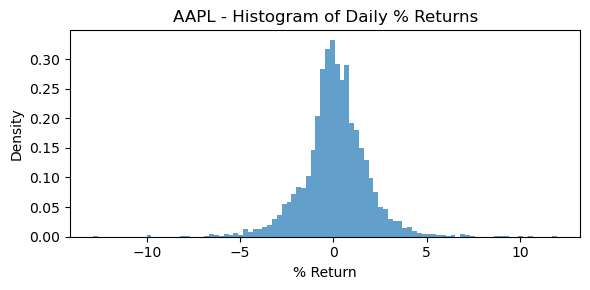

In [121]:
ticker = 'AAPL'

focus = ticker.strip().upper()
# Will use this fallback also for pair correlation
fallback = (
        df_cleaned.dropna(subset=['DailyRet'])
        .groupby('Symbol').size()
        .sort_values(ascending=False)
        .index.tolist()
    )

if df_cleaned[df_cleaned.Symbol == focus].empty:  # If ticker is not available in the cleaned df
    focus = fallback[0]
    print(f"Focus ticker '{ticker}' missing - using '{focus}' instead.")

focus_returns = df_cleaned.loc[df_cleaned.Symbol == focus, 'DailyRet'].dropna() * 100
if not focus_returns.empty:
    plt.figure(figsize=(6,3))
    plt.hist(focus_returns, density=True, bins='auto', alpha=0.7)
    
    plt.title(f'{focus} - Histogram of Daily % Returns')
    plt.xlabel('% Return')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


### 6.4 Correlation between two tickers


Correlation of daily returns — AAPL vs MSFT: 0.681


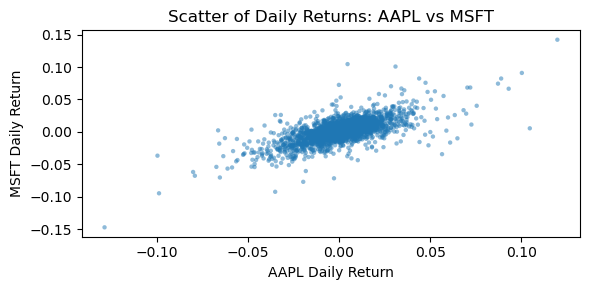

In [123]:
pair_wish = ('AAPL', 'MSFT')

pair = tuple(sym.strip().upper() for sym in pair_wish)

missing = [sym for sym in pair if sym not in fallback]
if missing:
    if len(fallback) > 1:
        pair = (fallback[0], fallback[1])
        print(f"Requested pair missing: {missing} - using ('{fallback[0]}', '{fallback[1]}') instead.")
    else:
        print('Not enough symbols with returns to compute a correlation.')
        pair = None

if pair is not None:
    pair_pivot = (
        df_cleaned[df_cleaned['Symbol'].isin(pair)]
        .pivot(index='Date', columns='Symbol', values='DailyRet')
        .dropna()
    )
    if pair_pivot.empty:
        print(f'Not enough overlapping data for {pair}. Try a different pair.')
    else:
        corr_val = pair_pivot.corr().iloc[0, 1]
        print(f'\nCorrelation of daily returns — {pair[0]} vs {pair[1]}: {corr_val:.3f}')

        # Scatter plot
        plt.figure(figsize=(6, 3))
        plt.scatter(pair_pivot[pair[0]], pair_pivot[pair[1]], s=10, alpha=0.5, edgecolor='none')
        
        plt.title(f'Scatter of Daily Returns: {pair[0]} vs {pair[1]}')
        plt.xlabel(f'{pair[0]} Daily Return')
        plt.ylabel(f'{pair[1]} Daily Return')
        plt.tight_layout()
        plt.show()


# Feature Engineering

In [125]:
# Choose a ticker
ticker = 'AAPL'

want = ticker.strip().upper()

# Fallback
fallback = (
    df_cleaned.groupby('Symbol').size()
    .sort_values(ascending=False)
    .index
    .tolist()
)
# Check if the chosen ticker is presented in DataFrame
if want not in df_cleaned.Symbol.unique():
    want = fallback[0]

# Choose price column
price_col = 'Adj Close'

### 1. Stock's history

In [127]:
stock_df = (
    df_cleaned.loc[df_cleaned.Symbol == want, ['Date', price_col, 'Volume']]
    .sort_values('Date')
    .reset_index(drop=True) 
    .copy()
)

print(f'Rows for {want}: {len(stock_df):,}')
if stock_df.empty:
    raise ValueError(f'No rows found for ticker {want}. Pick another symbol.')

Rows for AAPL: 2,516


### 2. Daily Return

In [129]:
stock_df['Return'] = stock_df[price_col].pct_change()

### 3. Lag features (yesterday, 2 days ago, 3 days ago)

In [131]:
# Lag Return
for lag in (1, 2, 3):
    stock_df[f'lag_{lag}_return'] = stock_df.Return.shift(lag)

# Lag Volume
stock_df['lag_1_volume'] = stock_df.Volume.shift(1)

### 4. Rolling windows:
1. moving averages
2. volatility
3. cumulative 3-day return (1+r1​)(1+r2​)(1+r3​)−1
4. participation

In [133]:
# Moving averages
stock_df['MA_5'] = stock_df[price_col].rolling(5).mean()
stock_df['MA_20'] = stock_df[price_col].rolling(20).mean()

# Volatility
stock_df['Volatility_5'] = stock_df.Return.rolling(5).std()
stock_df['Volatility_20'] = stock_df.Return.rolling(20).std()

# Cumulative 3-day return
stock_df['CumRet_3'] = (1 + stock_df.Return).rolling(3).apply(np.prod, raw=True) - 1

# Participation: how many Up days in last 5 days?
stock_df['UpDays_5'] = (stock_df.Return > 0).rolling(5).sum()

In [134]:
stock_df.isnull().sum()

Date              0
Adj Close         0
Volume            0
Return            1
lag_1_return      2
lag_2_return      3
lag_3_return      4
lag_1_volume      1
MA_5              4
MA_20            19
Volatility_5      5
Volatility_20    20
CumRet_3          3
UpDays_5          4
dtype: int64

### 5. Calendar features

In [136]:
stock_df['DayOfWeek'] = stock_df.Date.dt.dayofweek
stock_df['Month'] = stock_df.Date.dt.month

### 6. Market context

In [138]:
mrkt_series = df_cleaned.groupby('Date')[price_col].mean().sort_index()
mrkt_return = mrkt_series.pct_change()

# Align "yesterday’s market return” to today’s row

stock_df['lag_1_mrkt_return'] = stock_df.Date.map(mrkt_return.shift(1))

### 7. Target and features

In [140]:
#stock_df['UpTomorrow'] = (stock_df[price_col].shift(-1) > stock_df[price_col]).astype(int)

# Horizon: predict t+5 direction. Intuition: Daily moves are noisy; simple technical features may only give a tiny edge, if any.
h = 5
stock_df['Up_in_5'] = (stock_df[price_col].shift(-h) > stock_df[price_col]).astype(int)

target = 'Up_in_5'

features = ['lag_1_return', 'lag_2_return',
       'lag_3_return', 'lag_1_volume', 'MA_5', 'MA_20', 'Volatility_5',
       'Volatility_20', 'CumRet_3', 'UpDays_5', 'DayOfWeek', 'Month',
       'lag_1_mrkt_return']

stock_df.columns

Index(['Date', 'Adj Close', 'Volume', 'Return', 'lag_1_return', 'lag_2_return',
       'lag_3_return', 'lag_1_volume', 'MA_5', 'MA_20', 'Volatility_5',
       'Volatility_20', 'CumRet_3', 'UpDays_5', 'DayOfWeek', 'Month',
       'lag_1_mrkt_return', 'Up_in_5'],
      dtype='object')

### 8. Drop NaNs

In [142]:
before = len(stock_df)
stock_df = stock_df.dropna(subset=features + [target])
after = len(stock_df)

print(f'Dropped {before - after} rows due to initial lags/rolls/last-day target.')
print(f'Final modeling rows: {after:,}')
print(f'Remaining NaNs in features and target: {stock_df[features + [target]].isnull().sum().sum()}.')

Dropped 20 rows due to initial lags/rolls/last-day target.
Final modeling rows: 2,496
Remaining NaNs in features and target: 0.


### 9. Features and target correlation

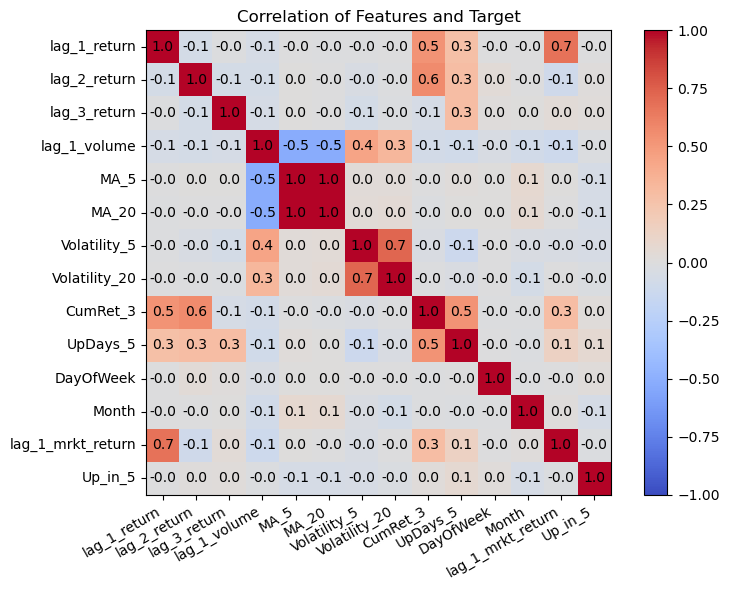

In [144]:
corr_matrix = stock_df[features + [target]].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar(im)

plt.title('Correlation of Features and Target')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=30, ha='right')
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index, rotation=0, va='center')

# Display correlation values on the heatmap
for (i, j), val in np.ndenumerate(corr_matrix.values):  # Loops over every element of N-dimensional numpy array
    plt.text(j, i, f'{val:.1f}', ha='center', va='center', color='black')
    
plt.tight_layout()
plt.show()

### 10. Class balance

In [146]:
cb = stock_df[target].value_counts(normalize=True).round(2)
print('\nClass balance:\n', cb.to_string())


Class balance:
 Up_in_5
1    0.58
0    0.42


# Modeling

### Import necessary libraries

In [187]:
from sklearn.metrics import (
accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
precision_recall_curve, auc, RocCurveDisplay
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance

### Choose target and features

In [151]:
# Features and target
X = stock_df[features].copy()
y = stock_df[target].copy()
print(f'X shape: {X.shape} | y shape: {y.shape}')

X shape: (2496, 13) | y shape: (2496,)


### Train test split

In [153]:
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f'Train rows: {len(X_train)} | Test rows: {len(X_test)}')

Train rows: 1996 | Test rows: 500


## 1. Baseline

In [155]:
# Majority class
majority_class = int(y_train.mode()[0])

In [156]:
# 1) Baseline-0 (predict only majority class)
y_pred_major = np.full(len(y_test), majority_class)
acc_major = accuracy_score(y_test, y_pred_major)
print(f"\nBaseline-0 (always {'Up' if majority_class == 1 else 'Down'}): accuracy = {acc_major:.3f}")


Baseline-0 (always Up): accuracy = 0.564


In [157]:
# 2) Baseline-1: 1-day momentum (predict tomorrow = today)
#y_pred_mom = y.shift(1).iloc[split_idx:]
#acc_mom = accuracy_score(y_test, y_pred_mom)
#print(f'Baseline-1 (1-day momentum): accuracy = {acc_mom:.3f}')

# Baseline-5: 5-day momentum 
stock_df['Momentum5'] = (stock_df[price_col] > stock_df[price_col].shift(5)).astype(int)

y_pred_mom5 = stock_df.Momentum5[y_test.index]
acc_mom5 = accuracy_score(y_test, y_pred_mom5)

print(f'Baseline-5 (5-day momentum): accuracy = {acc_mom5:.3f}')

Baseline-5 (5-day momentum): accuracy = 0.528


## 2. Logistic Regression

In [159]:
logit = make_pipeline(
    StandardScaler(),  
    LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        max_iter=500,
        random_state=0
    )
)

# Fit
logit.fit(X_train, y_train)

# Predict
y_pred_log = logit.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

print(f'\nLogistic Regression: accuracy = {acc_log:.3f}')


Logistic Regression: accuracy = 0.574


In [160]:
# Time-series-aware hyperparameter search
tscv = TimeSeriesSplit(n_splits=5)

# With Randomized Search CV 
pipe = make_pipeline(
    StandardScaler(), 
    LogisticRegression(
        max_iter=1300,
        random_state=0
    )
)

param_distributions = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    'logisticregression__class_weight': [None, 'balanced']
}

# Random search with 5-fold time-series-aware cross-validation
search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distributions,
    n_iter=20,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=0,
    error_score=0
)

# Fit
search.fit(X_train, y_train)

# Best classifier
logit = search.best_estimator_

# Coefficients (direction of influence; magnitude = relative strength)
log_coef = pd.Series(
    logit.named_steps['logisticregression'].coef_.ravel(),
    index=X.columns
).sort_values(ascending=False)

print('\nLogistic Regression coefficients (sorted, after StandardScaler):')
print(log_coef.to_string())

# Predict
y_pred_log = logit.predict(X_test) # Binary (for accuracy)
proba_log = logit.predict_proba(X_test)[:, 1] # Probability (for ROC-AUC)

# Accuracy
acc_log = accuracy_score(y_test, y_pred_log)

# ROC-AUC
auc_log = roc_auc_score(y_test, proba_log)

print(f'\nLogistic Regression: accuracy = {acc_log:.3f}, ROC-AUC = {auc_log:.3f}')




Logistic Regression coefficients (sorted, after StandardScaler):
UpDays_5             0.097198
DayOfWeek            0.010122
lag_1_return         0.000000
lag_2_return         0.000000
lag_3_return         0.000000
MA_5                 0.000000
Volatility_20        0.000000
CumRet_3             0.000000
Volatility_5        -0.015525
lag_1_mrkt_return   -0.029110
Month               -0.036802
lag_1_volume        -0.077983
MA_20               -0.130622

Logistic Regression: accuracy = 0.590, ROC-AUC = 0.590


/Users/estherboudagher/Desktop/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/estherboudagher/Desktop/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/estherboudagher/Desktop/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Use

In [161]:
search.best_params_

{'logisticregression__solver': 'liblinear',
 'logisticregression__penalty': 'l1',
 'logisticregression__class_weight': None,
 'logisticregression__C': 0.1}

In [212]:
# Coefficients for Logistic Regression
coefs_log = pd.Series(logit.named_steps['logisticregression'].coef_[0], index=X_train.columns).sort_values(ascending=False)
print('\nCoeffiecients - Logistic Regression:')
print(coefs_log.to_string())


Coeffiecients - Logistic Regression:
UpDays_5             0.097198
DayOfWeek            0.010122
lag_1_return         0.000000
lag_2_return         0.000000
lag_3_return         0.000000
MA_5                 0.000000
Volatility_20        0.000000
CumRet_3             0.000000
Volatility_5        -0.015525
lag_1_mrkt_return   -0.029110
Month               -0.036802
lag_1_volume        -0.077983
MA_20               -0.130622


## 3. Random Forest Classifier


In [163]:
rf = RandomForestClassifier(
    n_estimators=300,     
    min_samples_leaf=20,  
    random_state=0,
    n_jobs=-1
)

# Fit
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f'Random Forest: accuracy = {acc_rf:.3f}')

Random Forest: accuracy = 0.468


In [165]:
# Time-series-aware hyperparameter search
tscv = TimeSeriesSplit(n_splits=5)

# With Randomized Search CV 
param_distributions_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Random search with 5-fold time-series-aware cross-validation
search = RandomizedSearchCV(
    RandomForestClassifier(random_state=0),
    param_distributions=param_distributions_rf,
    n_iter=20,   
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=0,
    error_score=0
)

# Fit
search.fit(X_train, y_train)

# Best classifier
rf = search.best_estimator_

# Predict
y_pred_rf = rf.predict(X_test)            
proba_rf = rf.predict_proba(X_test)[:, 1] 

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)

# ROC-AUC
auc_rf = roc_auc_score(y_test, proba_rf)

print(f'\nRandom Forest: accuracy = {acc_rf:.3f}, ROC-AUC = {auc_rf:.3f}')


Random Forest: accuracy = 0.484, ROC-AUC = 0.497


In [167]:
search.best_params_ 

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 10,
 'class_weight': None}

In [214]:
# Feature importance for Random Forest
coefs_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('\nFeature Importance - Random Forest:')
print(coefs_rf.to_string())


Feature Importance - Random Forest:
MA_5                 0.147022
MA_20                0.146267
Volatility_20        0.103201
Volatility_5         0.085788
lag_1_volume         0.079986
lag_1_mrkt_return    0.069837
lag_3_return         0.069303
lag_2_return         0.068082
Month                0.066790
CumRet_3             0.066050
lag_1_return         0.060631
UpDays_5             0.022048
DayOfWeek            0.014996


## 4. XGBoost Classifier

In [169]:
# Time-series-aware hyperparameter search
tscv = TimeSeriesSplit(n_splits=5)

param_distributions_xgb = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # step size
    'subsample': [0.6, 0.8, 1.0],               # sample ratio
    'colsample_bytree': [0.6, 0.8, 1.0],        # feature ratio
    'min_child_weight': [1, 3, 5],         # controls leaf splits
    'gamma': [0, 1, 5],                        # min loss reduction
    'reg_lambda': [1, 5, 10],                  # L2 regularization
    'reg_alpha': [0, 1, 5],                    # L1 regularization
}

# Random search with 5-fold time-series-aware cross-validation
search = RandomizedSearchCV(
    XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=0),
    param_distributions=param_distributions_xgb,
    n_iter=40,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=0
)

# Fit
search.fit(X_train, y_train)

# Best estimator
xgb = search.best_estimator_

# Predict
y_pred_xgb = xgb.predict(X_test) 
proba_xgb = xgb.predict_proba(X_test)[:, 1] 

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# ROC-AUC
auc_xgb = roc_auc_score(y_test, proba_xgb)

print(f'\nXGBoost: accuracy = {acc_xgb:.3f}, ROC-AUC = {auc_xgb:.3f}')

/Users/estherboudagher/Desktop/Anaconda/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



XGBoost: accuracy = 0.466, ROC-AUC = 0.485


In [171]:
search.best_params_

{'subsample': 0.6,
 'reg_lambda': 10,
 'reg_alpha': 5,
 'n_estimators': 400,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 5,
 'colsample_bytree': 1.0}

In [216]:
# Feature importance for XGBoost
coefs_xgb = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('\nFeature Importance - XGBoost:')
print(coefs_xgb.to_string())


Feature Importance - XGBoost:
MA_20                0.108216
lag_1_volume         0.101079
MA_5                 0.094385
Volatility_20        0.086786
Month                0.084209
CumRet_3             0.079539
lag_3_return         0.077715
UpDays_5             0.077556
lag_2_return         0.077374
lag_1_return         0.072094
Volatility_5         0.071900
lag_1_mrkt_return    0.069147
DayOfWeek            0.000000


### 5. HistGradientBoostingClassifier

In [228]:
# 1) Time-series-aware CV
tscv = TimeSeriesSplit(n_splits=5)

# 2) Compact but general parameter grid
param_distributions_hgb = {
    'learning_rate': [0.01, 0.05, 0.1],   # slow, medium, fast learning
    'max_leaf_nodes': [15, 31, None],           # typical RF-style defaults
    'min_samples_leaf': [5, 20],          # smoother vs. more flexible
    'l2_regularization': [0.0, 1.0, 5.0], # controls overfitting
    'max_iter': [200, 400, 600],          # enough, early stopping cuts off earlier if needed
    'max_bins': [64, 128]                 # histogram binning granularity
}

# 3) Base model with early stopping
base_model = HistGradientBoostingClassifier(
    random_state=0,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=10,   
    scoring='roc_auc'     
)

# 4) RandomizedSearchCV setup
search = RandomizedSearchCV(
    base_model,
    param_distributions=param_distributions_hgb,
    n_iter=20,             
    cv=tscv,
    scoring='roc_auc',    
    n_jobs=-1,
    random_state=0,
    error_score=0          
)

# 5) Fit
search.fit(X_train, y_train)

# 6) Best model
hgb = search.best_estimator_

# 7) Evaluate on test
y_pred_hgb = hgb.predict(X_test)
proba_hgb = hgb.predict_proba(X_test)[:, 1]

acc_hgb = accuracy_score(y_test, y_pred_hgb)
auc_hgb = roc_auc_score(y_test, proba_hgb)

print(f'\nHistGradientBoosting: accuracy = {acc_hgb:.3f}, ROC-AUC = {auc_hgb:.3f}')



HistGradientBoosting: accuracy = 0.430, ROC-AUC = 0.486


In [230]:
search.best_params_

{'min_samples_leaf': 20,
 'max_leaf_nodes': 31,
 'max_iter': 400,
 'max_bins': 64,
 'learning_rate': 0.05,
 'l2_regularization': 1.0}

In [234]:
# Permutation importance for HistGradientBoosting
imp_hgb = permutation_importance(hgb, X_test, y_test, n_repeats=10, random_state=0)
imp_hgb_ser = pd.Series(imp_hgb.importances_mean, index=X.columns).sort_values(ascending=False)
print('Permutation importance - HistGradientBoosting:')
print(imp_hgb_ser.to_string())

Permutation importance - HistGradientBoosting:
lag_1_return         0.0002
lag_3_return        -0.0004
lag_2_return        -0.0006
Volatility_20       -0.0008
DayOfWeek           -0.0012
lag_1_volume        -0.0016
CumRet_3            -0.0026
lag_1_mrkt_return   -0.0028
UpDays_5            -0.0048
Volatility_5        -0.0068
MA_5                -0.0074
MA_20               -0.0084
Month               -0.0150


## Accuracy table and ROC-AUC table 
1. ROC-AUC = 0.5 for Baseline-0, because all scores are tied
2. ROC-AUC for Baseline-1 or Baseline-5 need additional calculation of probabilities, skip for test

In [236]:
results = (
    pd.DataFrame({
        'Model': [
            'Baseline-Majority', 'Baseline-Momentum(5d)', 'Logistic', 'RandomForest', 'XGBoost', 'HistGradientBoosting'
        ],
        'Accuracy': [acc_major, acc_mom5, acc_log, acc_rf, acc_xgb, acc_hgb],
        'ROC-AUC': [0.5, np.nan, auc_log, auc_rf, auc_xgb, auc_hgb]
    })
    .set_index('Model')
    .sort_values(by='Accuracy', ascending=False)
    .round(3)
)

print('Accuracy and  ROC-AUC comparison:')
print(results)

Accuracy and  ROC-AUC comparison:
                       Accuracy  ROC-AUC
Model                                   
Logistic                  0.590    0.590
Baseline-Majority         0.564    0.500
Baseline-Momentum(5d)     0.528      NaN
RandomForest              0.484    0.497
XGBoost                   0.466    0.485
HistGradientBoosting      0.430    0.486


## Confusion matrices

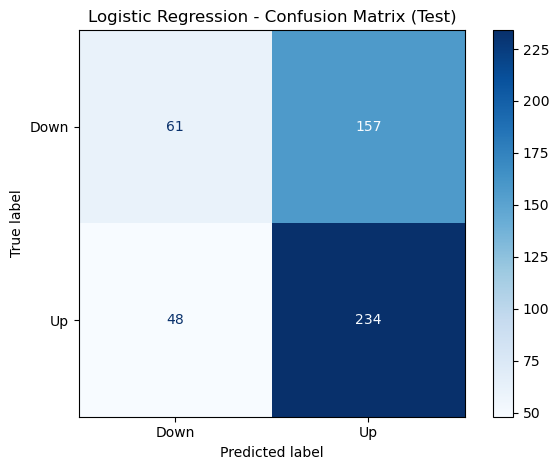

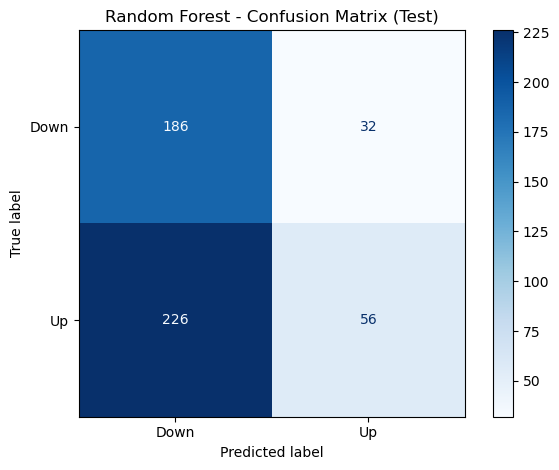

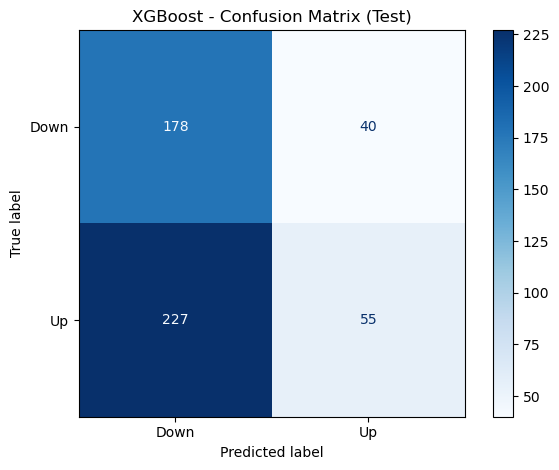

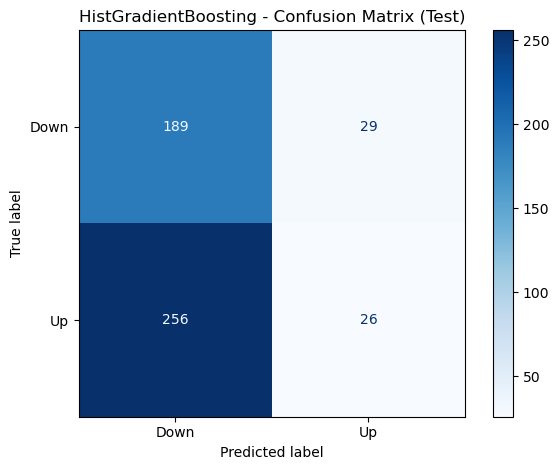

In [238]:
predictions = [
    ('Logistic Regression', y_pred_log),
    ('Random Forest', y_pred_rf),
    ('XGBoost', y_pred_xgb),
    ('HistGradientBoosting', y_pred_hgb)
]

for model, y_pred in predictions:
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(cm, display_labels=['Down', 'Up'])
    display.plot(cmap='Blues', values_format='d')
    plt.title(f'{model} - Confusion Matrix (Test)')
    plt.tight_layout()
    plt.show()
    
    

## Precision-Recall Curves

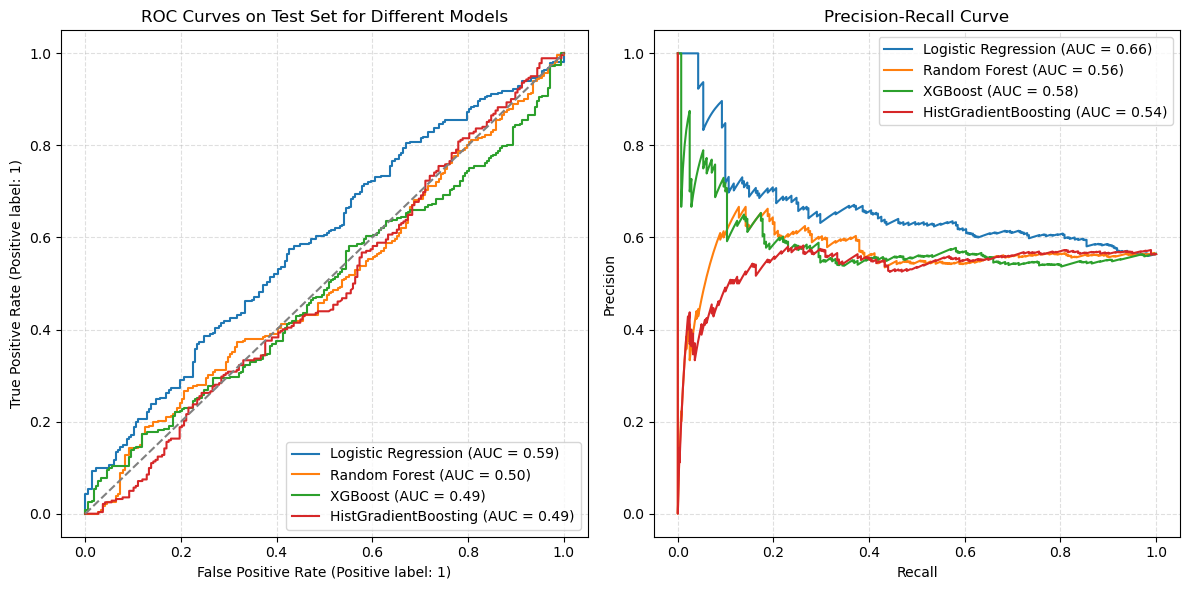

In [240]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

# Plot each model
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'HistGradientBoosting']
probabilities = [proba_log, proba_rf, proba_xgb, proba_hgb]

for model, y_proba in zip(model_names, probabilities):
    RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax[0], name=model)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)
    ax[1].plot(recall, precision, label=f'{model} (AUC = {auc_pr:.2f})')


ax[0].plot([0,1], [0,1], linestyle='--', color='gray', label='Random')
ax[0].set_title('ROC Curves on Test Set for Different Models')
ax[0].grid(linestyle='--', alpha=0.4)

ax[1].set(title='Precision-Recall Curve',
          xlabel='Recall',
          ylabel='Precision')
ax[1].grid(linestyle='--', alpha=0.4)

plt.legend()

plt.tight_layout()

## Feature importance for the best model (with highest accuracy)

### Logistic regression

In [243]:
imp_logit = permutation_importance(logit, X_test, y_test, n_repeats=10, random_state=0)
imp_logit_ser = pd.Series(imp_logit.importances_mean, index=X.columns).sort_values(ascending=False)
print('Permutation importance - Logistic Regression:')
print(imp_logit_ser.to_string())

Permutation importance - Logistic Regression:
MA_20                0.0204
Month                0.0192
UpDays_5             0.0182
lag_1_mrkt_return    0.0134
lag_1_volume         0.0060
lag_1_return         0.0000
lag_2_return         0.0000
lag_3_return         0.0000
MA_5                 0.0000
Volatility_20        0.0000
CumRet_3             0.0000
Volatility_5        -0.0012
DayOfWeek           -0.0012


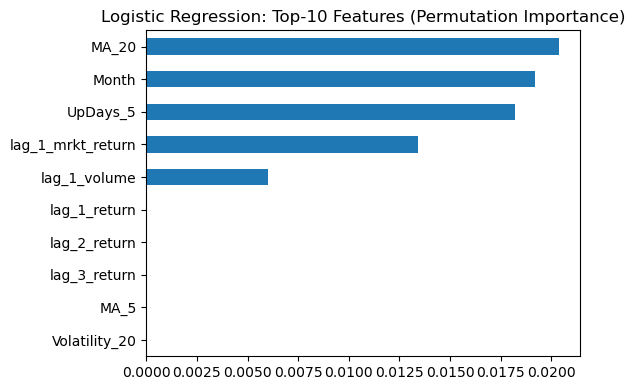

In [244]:
plt.figure(figsize=(6, 4))

imp_logit_ser.head(10)[::-1].plot(kind='barh')
plt.title('Logistic Regression: Top-10 Features (Permutation Importance)')
plt.tight_layout()
plt.show()

### Drop the negative/near-zero features and retrain

In [246]:
features_reduced = [
    'MA_20', 'Month', 'UpDays_5', 'lag_1_mrkt_return', 'lag_1_volume'
]

X_train_reduced, X_test_reduced = X_train[features_reduced], X_test[features_reduced]

In [247]:
# Time-series-aware hyperparameter search
tscv = TimeSeriesSplit(n_splits=5)

# With Randomized Search CV 
pipe = make_pipeline(
    StandardScaler(), 
    LogisticRegression(
        max_iter=500,
        random_state=0
    )
)

param_distributions = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    'logisticregression__class_weight': [None, 'balanced']
}

# Random search with 5-fold time-series-aware cross-validation
search_reduced = RandomizedSearchCV(
    pipe,
    param_distributions=param_distributions,
    n_iter=20,
    cv=tscv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=0,
    error_score=0
)

# Fit
search_reduced.fit(X_train_reduced, y_train)

# Best classifier
logit_reduced = search_reduced.best_estimator_

# Predict
y_pred_log_reduced = logit_reduced.predict(X_test_reduced)
proba_log_reduced = logit_reduced.predict_proba(X_test_reduced)[:, 1]

acc_log_reduced = accuracy_score(y_test, y_pred_log_reduced)

print(f'\nLogistic Regression (reduced features): accuracy = {acc_log_reduced:.3f}')


Logistic Regression (reduced features): accuracy = 0.602


/Users/estherboudagher/Desktop/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/estherboudagher/Desktop/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/estherboudagher/Desktop/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Use

###  “HIGH-CONFIDENCE” Logistic Regression predictions (p>0.8) - right vs wrong
Intuition: see where the model was very sure. Wrong-but-confident = blind spots.

In [249]:
# Find test dates
test_dates = pd.to_datetime(stock_df['Date'].reindex(X_test.index))

results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test.values,
    'Predicted': y_pred_log_reduced,
    'Probability': proba_log_reduced
})

In [250]:
# Define a 'high confidence' threshold
high_thr = 0.55

# Right Highs: model very confident up, and correct
right_hi_mask = (
    (results_df.Predicted == 1) & 
    (results_df.Actual == 1) & 
    (results_df.Probability > high_thr)
)
right_hi = results_df[right_hi_mask]

print(f'\nLogistic Regression high-confidence correct cases (p>{high_thr}): {len(right_hi)}')
print(right_hi.head().to_string())

# Wrong Highs: model very confident up, but wrong
wrong_hi_mask = (
    (results_df.Predicted == 1) & 
    (results_df.Actual == 0) & 
    (results_df.Probability > high_thr)
)
wrong_hi = results_df[wrong_hi_mask]

print(f'\nLogistic Regression high-confidence wrong cases (p>{high_thr}): {len(wrong_hi)}')
print(wrong_hi.head().to_string())


Logistic Regression high-confidence correct cases (p>0.55): 79
           Date  Actual  Predicted  Probability
2047 2023-01-03       1          1     0.553228
2048 2023-01-04       1          1     0.563725
2049 2023-01-05       1          1     0.562529
2050 2023-01-06       1          1     0.580312
2051 2023-01-09       1          1     0.557568

Logistic Regression high-confidence wrong cases (p>0.55): 37
           Date  Actual  Predicted  Probability
2021 2022-11-23       0          1     0.560536
2069 2023-02-03       0          1     0.571379
2071 2023-02-07       0          1     0.594595
2075 2023-02-13       0          1     0.568864
2077 2023-02-15       0          1     0.568047
